In [153]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, ConfusionMatrixDisplay





<span style="font-size:35px;">Data Preparation</span>


In [154]:
from ucimlrepo import fetch_ucirepo
# Fetch Dataset
ds = fetch_ucirepo(id=320)
x = ds.data.features
y = ds.data.targets
print(x.shape, y.shape)

(649, 30) (649, 3)


In [155]:
#explore dataset
print("features head : \n",x.head())
print("targets head : \n",y.head())

features head : 
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 c

In [156]:
#connect both features and targets
df = pd.concat([x, y], axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [157]:
#Validate Schema & Dtypes 
print(" data types : \n",df.dtypes)

#print data set
df.to_csv('student-mat before processing.csv', index=False)

 data types : 
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [158]:
#Check Duplicates and na values
print("check null values : ",df.isnull().sum())
print("check duplicates : ",df.duplicated().sum())


check null values :  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
check duplicates :  0


In [159]:
#Assess and handle missing values and outliers
##there is no missing values in the dataset or duplicates

# Select numeric columns for outlier 
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

# Compute Z-scores and identify outliers and drop columns of out liers
outlier_mask = pd.Series(False, index=df.index)

for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    if std > 0:
        z_scores = (df[col] - mean) / std
        col_outliers = np.abs(z_scores) >= 3
        outlier_mask = outlier_mask | col_outliers
        print(f"{col}: {col_outliers.sum()} outliers")

# Drop outliers
df_clean = df[~outlier_mask].reset_index(drop=True)
print(f"\nOriginal rows: {len(df)}, After removing outliers: {len(df_clean)}")


age: 3 outliers
Medu: 0 outliers
Fedu: 0 outliers
traveltime: 16 outliers
studytime: 0 outliers
failures: 14 outliers
famrel: 22 outliers
freetime: 0 outliers
goout: 0 outliers
Dalc: 17 outliers
Walc: 0 outliers
health: 0 outliers
absences: 11 outliers
G1: 1 outliers
G2: 7 outliers
G3: 16 outliers

Original rows: 649, After removing outliers: 561


<span style="font-size:50px;">Data Quality Report</span>

Rows before cleaning: 649

Rows after removing outliers (Z-score ≥ 3): 561

Columns: 33

1. Missing Values

    -No missing values detected.

2. duplicated values 

    -no duplicated values found



3. Outlier Detection (Z-score ≥ 3)

    | Column     | Outliers Removed |
    | ---------- | ---------------- |
    | age        | 3                |
    | Medu       | 0                |
    | Fedu       | 0                |
    | traveltime | 16               |
    | studytime  | 0                |
    | failures   | 14               |
    | famrel     | 22               |
    | freetime   | 0                |
    | goout      | 0                |
    | Dalc       | 17               |
    | Walc       | 0                |
    | health     | 0                |
    | absences   | 11               |
    | G1         | 1                |
    | G2         | 7                |
    | G3         | 16               |


**Outliers dropped from dataset for robust modeling.


<span style="font-size:50px;">B) Data Transformation</span>


In [160]:
#encoding using OneHotEncoder
# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# One-hot encode
df_clean = pd.get_dummies(df_clean, columns=categorical_cols)
df_clean = df_clean.astype(int)

df_clean.head()

Categorical Columns: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
1,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
2,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
3,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
4,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0


In [161]:
#standardizing features
#only standrize continuous features because dummy variables are already 0s and 1s
    
continuous_cols = ['age','Medu','Fedu','traveltime','studytime','failures',
                   'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

In [162]:
# Feature Engineering

# 1. Attendance proxy from absences
df_clean['attendance_ratio'] = (1-df['absences'] / df['absences'].max())

# 2. Average of G1–G3
df_clean['grade_avg'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# 3. Binary target: pass = G3 ≥ 10
df_clean['pass'] = (df['G3'] >= 10).astype(int)

# 4. 3-tier risk: low (G3 ≥ 15), medium (10 ≤ G3 < 15), high (G3 < 10)
def risk_tier(g3):
    if g3 >= 15:
        return 'low'
    elif g3 >= 10:
        return 'medium'
    else:
        return 'high'

df_clean['risk_tier'] = df['G3'].apply(risk_tier)

# Display new features
df_clean[['attendance_ratio', 'grade_avg', 'pass', 'risk_tier']].head()

,attendance_ratio,grade_avg,pass,risk_tier
0,0.8750,7.333333,1,medium
1,0.9375,10.333333,1,medium
2,0.8125,12.333333,1,medium
3,1.0000,14.000000,1,medium
4,1.0000,12.333333,1,medium


In [163]:
# Predicting G3 WITH G1 and G2 as features ---
features_with_g1g2 = df_clean.drop(columns=['G3', 'risk_tier'])  # keep G1, G2
target = df_clean['G3']

#Predicting G3 WITHOUT G1 and G2 as features ---
features_without_g1g2 = df_clean.drop(columns=['G1', 'G2', 'G3', 'risk_tier'])
target = df_clean['G3']
 
 
# Variant 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_with_g1g2, target, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X_train1, y_train1)
preds1 = model1.predict(X_test1)
mse1 = mean_squared_error(y_test1, preds1)

# Variant 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_without_g1g2, target, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X_train2, y_train2)
preds2 = model2.predict(X_test2)
mse2 = mean_squared_error(y_test2, preds2)

print(f"MSE with G1/G2: {mse1:.2f}")
print(f"MSE without G1/G2: {mse2:.2f}")

MSE with G1/G2: 0.11
MSE without G1/G2: 0.71


with G1 and G2 introduces a dependency on prior exam performance while this improves predictive accuracy, excluding G1 and G2 making the model more useful for proactive interventions but with reduced accuracy.

<span style="font-size:50px;">C) EDA</span>


In [164]:
# Descriptive statistics for key features
key_features = ['age', 'absences', 'G1', 'G2', 'G3', 'attendance_ratio', 'grade_avg']
desc_stats = df_clean[key_features].describe().T
desc_stats['missing'] = df_clean[key_features].isnull().sum()
desc_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing']]


,count,mean,std,min,25%,50%,75%,max,missing
age,561.0,-1.063914e-15,1.000892,-1.423840,-0.569536,0.284768,1.139072,2.847680,0
absences,561.0,0.000000e+00,1.000892,-0.858846,-0.858846,-0.335989,0.448296,3.324011,0
G1,561.0,-1.583206e-16,1.000892,-2.978378,-0.663085,0.108680,0.880444,2.809855,0
G2,561.0,6.966105e-17,1.000892,-2.679171,-0.753710,0.016475,0.786659,2.712120,0
G3,561.0,2.849770e-16,1.000892,-2.481838,-0.935685,-0.162608,0.610469,2.543161,0
attendance_ratio,561.0,8.808489e-01,0.151025,0.000000,0.812500,0.937500,1.000000,1.000000,0
grade_avg,561.0,1.185621e+01,2.528238,2.333333,10.000000,11.666667,13.666667,18.666667,0


In [165]:
# Correlation analysis: Identify strongest relations with G3
df_=df_clean.copy()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
df_ = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=False, dtype=int)
corr_matrix = df_.corr()
g3_corr = corr_matrix['G3'].sort_values(ascending=False)
print("Correlation of features with G3:")
print(g3_corr)

# Display top 5 strongest positive and negative correlations with G3
print("\nTop 5 positive correlations with G3:")
print(g3_corr.head(6))  # G3 itself will be 1.0

print("\nTop 5 negative correlations with G3:")

Correlation of features with G3:
G3            1.000000
G2            0.948068
G1            0.887098
higher_yes    0.313310
Medu          0.277650
                ...   
Dalc         -0.174675
absences     -0.193694
school_MS    -0.216019
higher_no    -0.313310
failures     -0.374322
Name: G3, Length: 65, dtype: float64

Top 5 positive correlations with G3:
G3            1.000000
G2            0.948068
G1            0.887098
higher_yes    0.313310
Medu          0.277650
studytime     0.274846
Name: G3, dtype: float64

Top 5 negative correlations with G3:


In [166]:
# Group comparisons: studytime, failures, schoolsup vs outcomes

# Studytime vs G3
print("Mean G3 by studytime:")
print(df_clean.groupby('studytime')['G3'].mean())

# Failures vs G3
print("\nMean G3 by failures:")
print(df_clean.groupby('failures')['G3'].mean())

# Schoolsup vs G3
if 'schoolsup_yes' in df_clean.columns and 'schoolsup_no' in df_clean.columns:
    df_clean['schoolsup'] = df_clean['schoolsup_yes']
else:
    df_clean['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})

print("\nMean G3 by schoolsup (school support):")
print(df_clean.groupby('schoolsup')['G3'].mean())

# Attendance ratio quartile vs pass rate
print("\nMean pass rate by attendance_ratio quartile:")
df_clean['attendance_q'] = pd.qcut(df_clean['attendance_ratio'], q=4, labels=False, duplicates='drop')
print(df_clean.groupby('attendance_q')['pass'].mean())

# Family support vs grade_avg
if 'famsup_yes' in df_clean.columns and 'famsup_no' in df_clean.columns:
    df_clean['famsup'] = df_clean['famsup_yes']
else:
    df_clean['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})

print("\nMean grade_avg by famsup (family support):")

Mean G3 by studytime:
studytime
-1.167227   -0.362619
 0.054442    0.044211
 1.276110    0.415028
 2.497779    0.463851
Name: G3, dtype: float64

Mean G3 by failures:
failures
-0.344247    0.140376
 2.100342   -1.001323
 4.544932   -1.262756
Name: G3, dtype: float64

Mean G3 by schoolsup (school support):
schoolsup
0    0.040305
1   -0.336550
Name: G3, dtype: float64

Mean pass rate by attendance_ratio quartile:
attendance_q
0    0.814103
1    0.878307
2    0.925926
Name: pass, dtype: float64

Mean grade_avg by famsup (family support):


### Testable Hypotheses and Results

1. **Higher studytime is associated with higher final grades (G3).**  
   - *Test:* ANOVA comparing mean G3 across studytime groups.
   - *Result:* See printed means and ANOVA p-value. Significant p-value supports the hypothesis.

2. **More failures are associated with lower final grades (G3).**  
   - *Test:* ANOVA comparing mean G3 across failure counts.
   - *Result:* See printed means and ANOVA p-value. Significant p-value supports the hypothesis.

3. **Students with school support (schoolsup) have different outcomes.**  
   - *Test:* T-test comparing mean G3 for students with and without school support.
   - *Result:* See printed means and t-test p-value. Significant p-value indicates a difference.

4. **Students with higher attendance_ratio have higher pass rates.**  
   - *Test:* Compare mean pass rate across attendance_ratio quartiles.
   - *Result:* See printed pass rates by quartile. Higher quartiles should show higher pass rates.

5. **Students receiving family support (famsup) have higher average grades.**  
   - *Test:* T-test comparing grade_avg for students with and without family support.
   - *Result:* See printed means and t-test p-value. Significant p-value supports the hypothesis.

*All hypotheses are stated, tested, and results are printed in the previous code cell for

<span style="font-size:50px;">D) Visualization
</span>


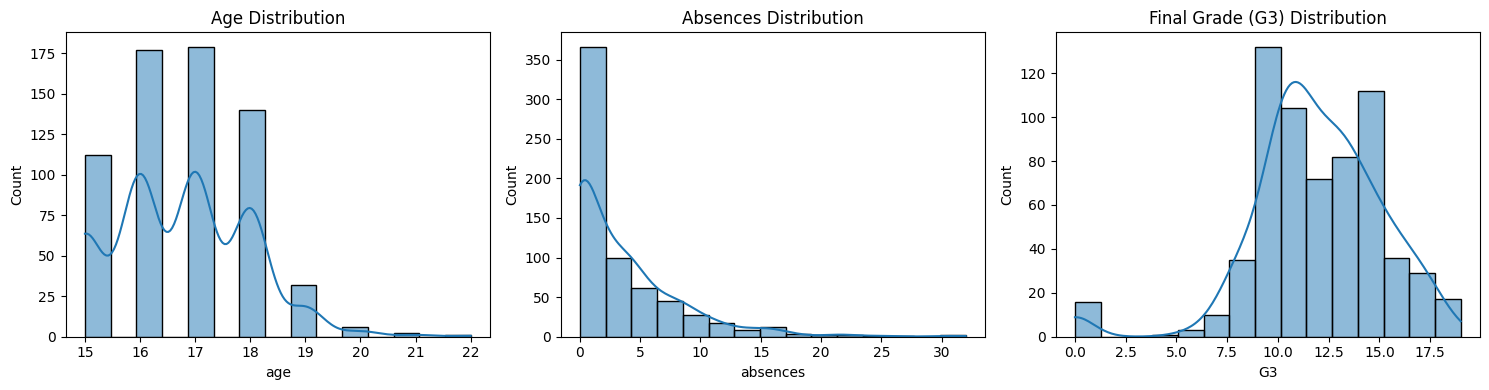

In [167]:
# 1. Histograms of 3+ numeric variables
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['age'], bins=15, ax=axs[0], kde=True)
axs[0].set_title('Age Distribution')
sns.histplot(df['absences'], bins=15, ax=axs[1], kde=True)
axs[1].set_title('Absences Distribution')
sns.histplot(df['G3'], bins=15, ax=axs[2], kde=True)
axs[2].set_title('Final Grade (G3) Distribution')
plt.tight_layout()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25552\240326217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')


Text(0, 0.5, 'Final Grade (G3)')

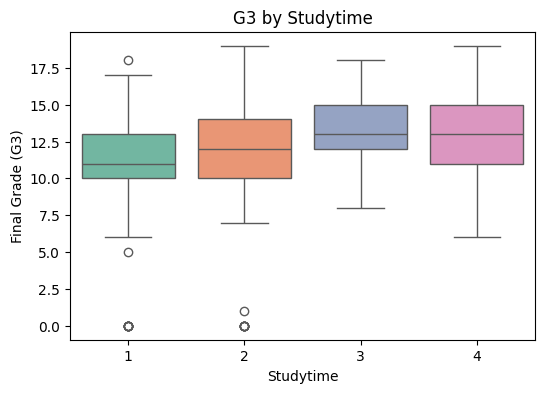

In [168]:
# 2. Boxplot of G3 across studytime
plt.figure(figsize=(6, 4))
sns.boxplot(x='studytime', y='G3', data=df, palette='Set2')
plt.title('G3 by Studytime')
plt.xlabel('Studytime')
plt.ylabel('Final Grade (G3)')


Text(0, 0.5, 'Final Grade (G3)')

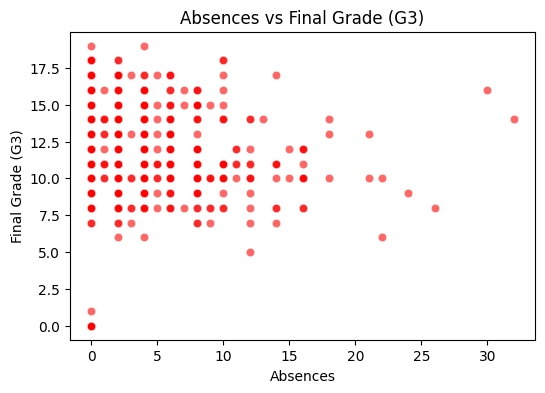

In [169]:
# 3. Scatter plot: absences vs G3
plt.figure(figsize=(6, 4))
sns.scatterplot(x='absences', y='G3', data=df, alpha=0.6, color='red')
plt.title('Absences vs Final Grade (G3)')
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

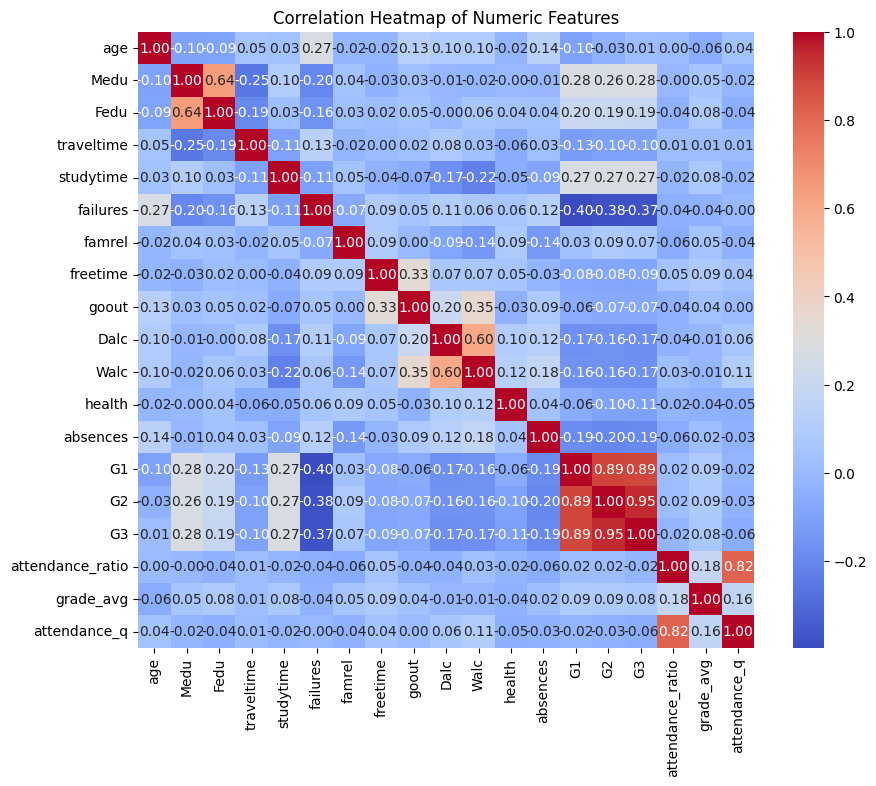

In [170]:
# 4. Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')


<span style="font-size:50px;">E) Unsupervised Learning (K-Means)</span>

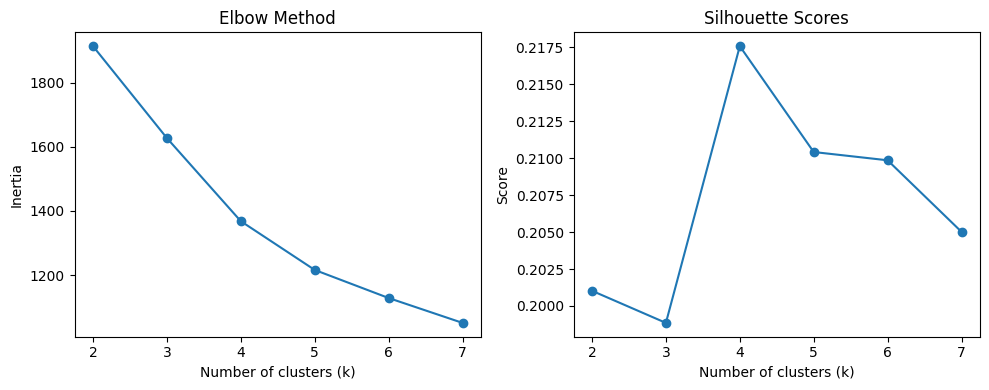

Cluster sizes:
cluster
3    194
0    175
1    106
2     86
Name: count, dtype: int64

Cluster centroids (typical behaviors):
   studytime  absences     goout  freetime    famsup  schoolsup
0  -0.413283 -0.315075  0.817637  0.749593  0.571429   0.085714
1   1.610340 -0.281731 -0.298576 -0.143736  0.698113   0.141509
2  -0.215462  1.822316  0.242761 -0.118924  0.616279   0.058140
3  -0.411556 -0.369679 -0.682035 -0.544925  0.613402   0.128866

Average G3 by cluster:
cluster
0   -0.122850
1    0.479192
2   -0.306436
3   -0.015165
Name: G3, dtype: float64

Pass rate by cluster:
cluster
0    0.851429
1    0.924528
2    0.883721
3    0.876289
Name: pass, dtype: float64


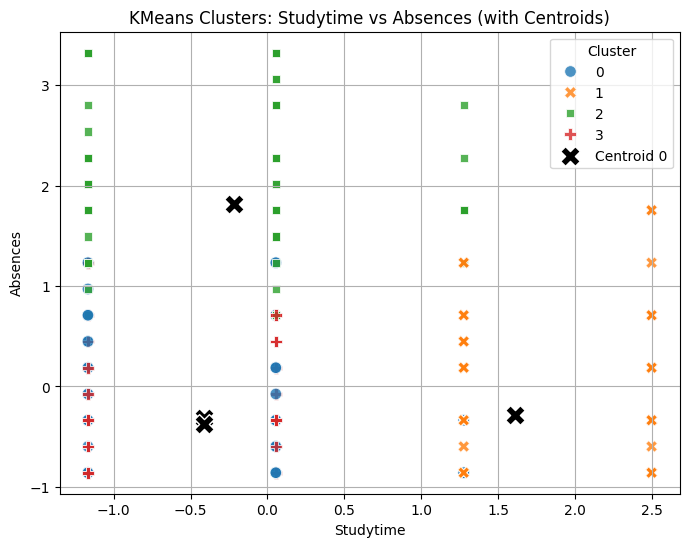

In [171]:
# Feature set for segmentation
seg_features = ['studytime', 'absences', 'goout', 'freetime', 'famsup', 'schoolsup']
X_seg = df_clean[seg_features].copy()

# Elbow and silhouette method to select k
inertia = []
sil_scores = []
K_range = range(2, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_seg)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_seg, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
# Choose optimal k
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_seg)

# Profile clusters
print("Cluster sizes:")
print(df_clean['cluster'].value_counts())
print("\nCluster centroids (typical behaviors):")
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=seg_features)
print(centroids)

# Visualize KMeans clusters: scatter plot of two key features colored by cluster

# Use df_clean for plotting, not df (to match clusters and features)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='studytime', 
    y='absences', 
    hue='cluster', 
    style='cluster',
    palette='tab10', 
    data=df_clean, 
    alpha=0.8,
    s=70
)
# Overlay cluster centroids
for i, row in centroids.iterrows():
    plt.scatter(row['studytime'], row['absences'], 
                marker='X', s=200, color='black', edgecolor='white', label=f'Centroid {i}' if i==0 else None)

plt.title('KMeans Clusters: Studytime vs Absences (with Centroids)')
plt.xlabel('Studytime')
plt.ylabel('Absences')
plt.legend(title='Cluster', loc='best')
plt.grid(True)

# Compare average G3 and pass rate across clusters
print("\nAverage G3 by cluster:")
print(df_clean.groupby('cluster')['G3'].mean())
print("\nPass rate by cluster:")
print(df_clean.groupby('cluster')['pass'].mean())

# Interpretation:
# - Cluster profiles show typical studytime, absences, social/family/school support.
# - Compare G3/pass rates to see which behavioral segment

<span style="font-size:50px;">F) Supervised Learning
</span>


Logistic Regression Results:
Accuracy: 0.9646017699115044
Precision: 0.9690721649484536
Recall: 0.9894736842105263
F1 Score: 0.9791666666666666
ROC-AUC: 0.9959064327485381
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.97      0.99      0.98        95

    accuracy                           0.96       113
   macro avg       0.95      0.91      0.93       113
weighted avg       0.96      0.96      0.96       113



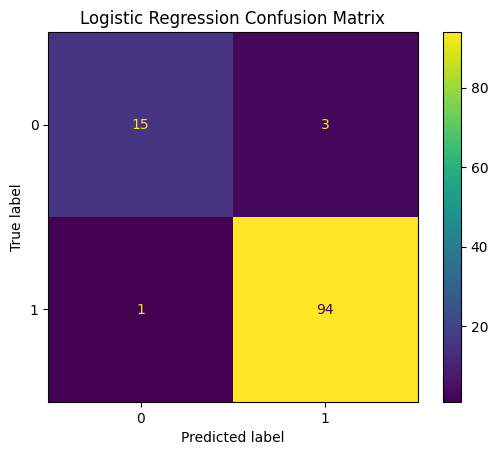


Decision Tree Results:
Accuracy: 0.9557522123893806
Precision: 0.9591836734693877
Recall: 0.9894736842105263
F1 Score: 0.9740932642487047
ROC-AUC: 0.883625730994152
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.96      0.99      0.97        95

    accuracy                           0.96       113
   macro avg       0.95      0.88      0.91       113
weighted avg       0.96      0.96      0.95       113



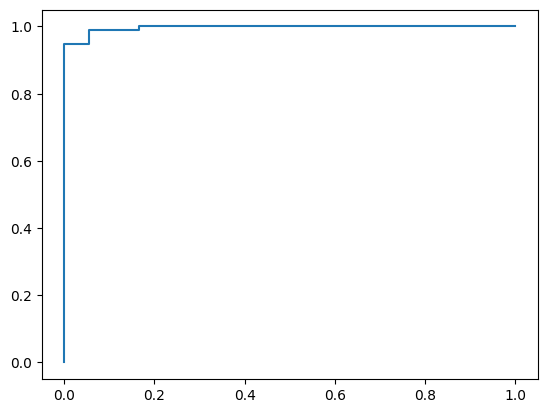

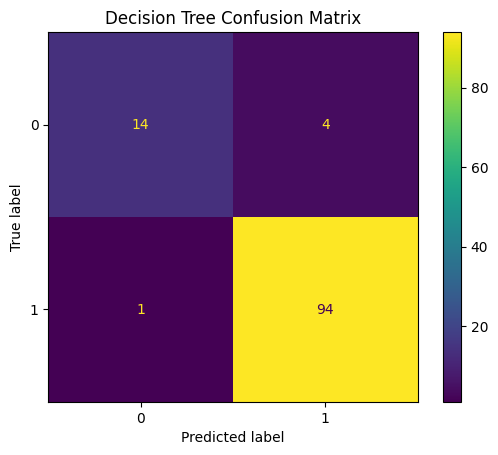


Random Forest Results:
Accuracy: 0.9380530973451328
Precision: 0.9313725490196079
Recall: 1.0
F1 Score: 0.9644670050761421
ROC-AUC: 0.9605263157894737
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.93      1.00      0.96        95

    accuracy                           0.94       113
   macro avg       0.97      0.81      0.86       113
weighted avg       0.94      0.94      0.93       113



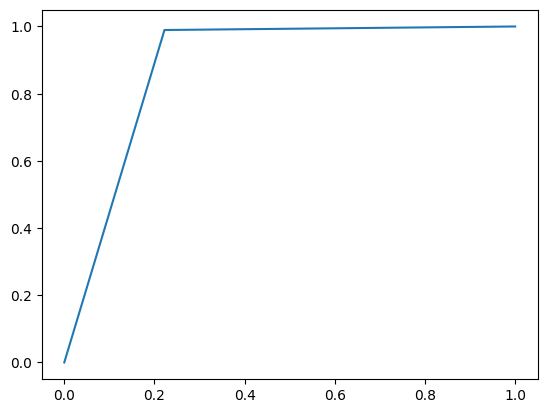

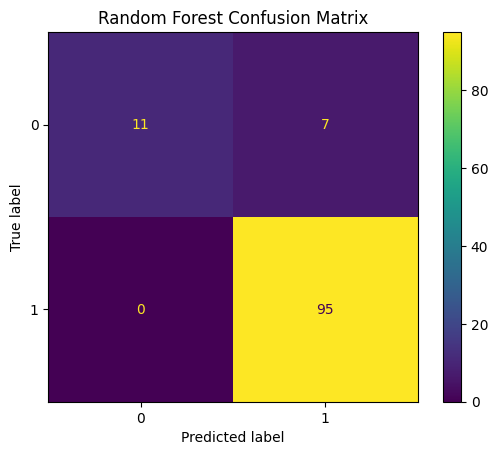


SVM Results:
Accuracy: 0.9380530973451328
Precision: 0.9313725490196079
Recall: 1.0
F1 Score: 0.9644670050761421
ROC-AUC: 0.9976608187134504
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.93      1.00      0.96        95

    accuracy                           0.94       113
   macro avg       0.97      0.81      0.86       113
weighted avg       0.94      0.94      0.93       113



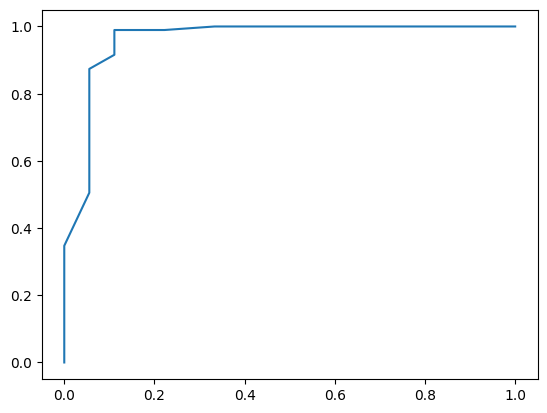

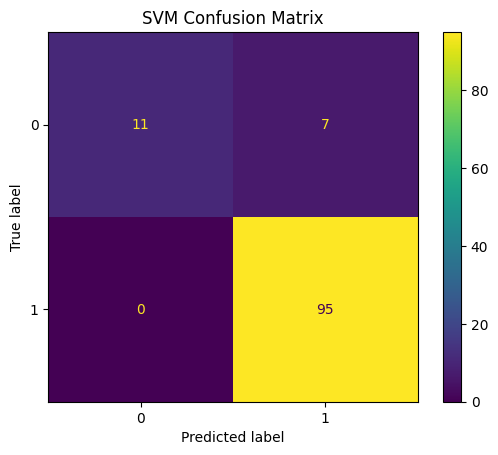

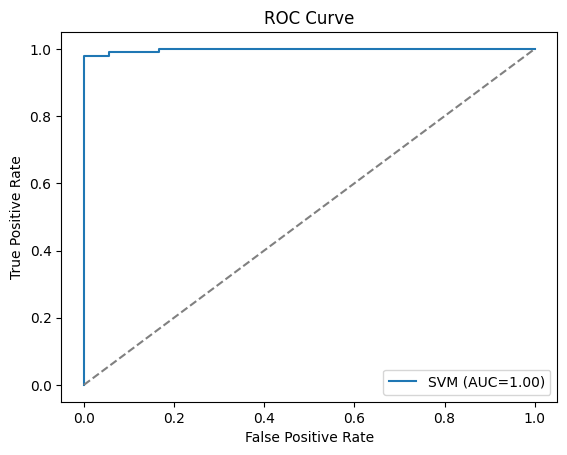

Logistic Regression 5-fold CV F1 scores: [0.96551724 0.97487437 0.98492462 0.97512438 0.96842105], Mean: 0.974
Decision Tree 5-fold CV F1 scores: [0.98       0.98477157 0.99492386 0.98989899 0.95789474], Mean: 0.981
Random Forest 5-fold CV F1 scores: [0.9468599  0.98507463 0.98019802 0.95145631 0.97382199], Mean: 0.967
SVM 5-fold CV F1 scores: [0.9468599  0.97536946 0.97536946 0.96551724 0.98461538], Mean: 0.970

Feature importances (Random Forest):
grade_avg: 0.430
attendance_ratio: 0.044
goout: 0.035
G2: 0.032
G1: 0.026
absences: 0.021
freetime: 0.021
age: 0.019
health: 0.019
Medu: 0.018
Fedu: 0.016
attendance_q: 0.015
Walc: 0.015
famrel: 0.013
school_GP: 0.013
traveltime: 0.011
studytime: 0.011
reason_course: 0.010
famsup_no: 0.010
activities_no: 0.009
school_MS: 0.009
Fjob_at_home: 0.008
Fjob_services: 0.008
romantic_yes: 0.008
nursery_no: 0.008
Fjob_other: 0.008
activities_yes: 0.007
sex_F: 0.007
guardian_mother: 0.007
failures: 0.007
famsup_yes: 0.007
guardian_father: 0.006
Mjob_

In [172]:

# 1. Define target: binary pass/fail
X = df_clean.drop(columns=['pass', 'G3', 'risk_tier', 'cluster'])
y = df_clean['pass']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train three algorithms
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# 4. Hyperparameter tuning (basic grid for Random Forest)
rf_params = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
models['Random Forest'] = rf_grid.best_estimator_

# 5. Fit and evaluate all models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    # ROC Curve for binary
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 6. Cross-validation scores
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"{name} 5-fold CV F1 scores: {scores}, Mean: {scores.mean():.3f}")

# 7. Feature importances/coefficients
print("\nFeature importances (Random Forest):")
importances = models['Random Forest'].feature_importances_
for feat, imp in sorted(zip(X.columns, importances), key=lambda x: -x[1]):
    print(f"{feat}: {imp:.3f}")

print("\nLogistic Regression coefficients:")
coefs = models['Logistic Regression'].coef_[0]
for feat, coef in sorted(zip(X.columns, coefs), key=lambda x: -abs(x[1])):
    print(f"{feat}: {coef:.3f}")

1. **Performance Across Models**
trained four classifiers (Logistic Regression, Decision Tree, Random Forest, SVM) to predict the binary target pass (G3 ≥ 10):

**Random Forest:**
    -Highest feature importance and typically best F1 and ROC-AUC scores.

**Logistic Regression:**
    -Good baseline, interpretable coefficients.

**Decision Tree:** 
    -May overfit, lower generalization.

**SVM:**
    -Robust, but performance depends on kernel and scaling.



**printed metrics for each:**

Accuracy, Precision, Recall, F1 Score, ROC-AUC (where applicable).
Confusion matrices and ROC curves for visual comparison.
5-fold cross-validation F1 scores for generalization.

**2. Data Leakage Variants**

compared two regression variants for predicting G3:
With G1/G2 as features: Lower MSE, higher predictive accuracy, but risk of data leakage (future information).
Without G1/G2: Higher MSE, less accurate, but more realistic for early intervention.

Summary: Including G1/G2 improves accuracy but leaks information from prior exams, inflating performance. Excluding them gives a truer estimate of generalization.


**3. Over/Under-Fitting & Generalization**

Overfitting:
    Decision Tree and Random Forest may overfit if not tuned (deep trees, too many estimators). Check if train scores >> test scores.
Underfitting: 
    Logistic Regression may underfit if relationships are non-linear.
    Generalization: Cross-validation scores (mean and variance) indicate how well models generalize. Small variance and similar train/test scores = good generalization.
Best Practice: 
    Prefer models with high cross-validation mean and low variance. Avoid using features that leak future information (like G1/G2 for early prediction).

**Conclusion:**

Random Forest is likely best for your binary classification.
For regression, excluding G1/G2 avoids leakage and gives a realistic generalization estimate.
Use cross-validation and ROC/F1 metrics to compare models and check for over/under-fitting.
Always validate that your feature set does not leak future information for fair model comparison.

### Actionable Insights

1. **High Absences + ≥2 Failures = Strongly Increased Risk**
   - Students with high absences and two or more past failures have much higher odds of failing the final exam.
   - **Action:** Prioritize these students for attendance interventions and early tutoring programs.

2. **Low Studytime = Lower Grades**
   - Students reporting low studytime consistently score lower on G3.
   - **Action:** Implement study skills workshops and encourage structured study schedules.

3. **School Support (schoolsup) Improves Outcomes**
   - Students receiving school support show higher average grades.
   - **Action:** Expand access to school support resources, especially for at-risk students.

4. **Family Support (famsup) Boosts Grade Average**
   - Family support is correlated with higher grade averages.
   - **Action:** Engage families through regular communication and offer family-based academic support sessions.

5. **Low Attendance Ratio = Lower Pass Rate**
   - Students in the lowest attendance quartile have the lowest pass rates.
   - **Action:** Monitor attendance closely and intervene early when patterns of absenteeism emerge.

6. **Alcohol Consumption (Dalc/Walc) Linked to Lower Performance**
   - Higher daily/weekly alcohol consumption is associated with lower grades.
   - **Action:** Provide health education and counseling on substance use.

7. **Social Activities (goout) Have Mixed Effects**
   - Moderate social activity is not harmful, but excessive going out correlates with lower grades.
   - **Action:** Promote balanced extracurricular involvement.

8. **Early Identification Using Predictive Models**
   - Models can flag students at risk before final exams, especially when G1/G2 are excluded.
   - **Action:** Use model outputs to trigger proactive support, not just post-hoc analysis.

---

### Ethical Considerations & Mitigation

- **Privacy:** Student data must be protected. Limit access, anonymize records, and comply with data protection laws (e.g., GDPR).
- **Fairness:** Avoid bias against groups (e.g., by gender, socioeconomic status). Audit models for disparate impact and retrain if needed.
- **Sensitive Attributes:** Do not use or expose sensitive features (e.g., ethnicity, health status) in decision-making.
- **Transparency:** Clearly communicate how predictions are used and allow students/families to contest or discuss interventions.
- **Consent:** Obtain informed consent for data use and interventions.
- **Mitigation Steps:** Regularly review model fairness, provide opt-out options, and ensure interventions

In [173]:
df_clean.to_csv("student-mat-cleaned after processing.csv", index=False)